In [96]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
epoch_key = ('Roqui', 5, 2)

In [99]:
from src.load_data import _get_pos_dataframe
from src.parameters import ANIMALS

position_info = _get_pos_dataframe(epoch_key, ANIMALS)
position_info

,nose_x,nose_y,nose_vel,tailBase_x,tailBase_y,tailBase_vel,tailMid_x,tailMid_y,tailMid_vel,tailTip_x,...,forepawL_vel,forepawR_x,forepawR_y,forepawR_vel,hindpawL_x,hindpawL_y,hindpawL_vel,hindpawR_x,hindpawR_y,hindpawR_vel
time,,,,,,,,,,,,,,,,,,,,,
00:25:01.474544,106.024191,90.565393,-19.466150,85.426632,92.204578,0.000772,79.207901,95.303589,0.000827,73.884647,...,0.000545,102.741410,92.800039,-0.000871,91.239169,90.140545,-0.002439,89.223088,94.396685,0.000321
00:25:01.482546,86.558041,68.374660,0.038467,85.427404,92.209643,0.000444,79.208728,95.304962,0.000226,73.885150,...,0.007812,102.740539,92.797481,0.000601,91.236730,90.138683,0.003559,89.223409,94.400626,-0.068895
00:25:01.490547,86.596508,68.264030,19.404074,85.427848,92.205733,-0.002121,79.208953,95.304935,-0.000326,73.885300,...,-0.017457,102.741139,92.798448,0.009206,91.240289,90.137677,-0.002356,89.154514,94.526352,0.068733
00:25:01.498548,106.000582,90.548671,0.006947,85.425727,92.204240,0.005374,79.208627,95.303654,0.000099,73.885353,...,0.012226,102.750345,92.811350,0.007716,91.237933,90.146848,-0.008337,89.223247,94.399976,0.005833
00:25:01.506539,106.007529,90.548918,-19.356929,85.431101,92.203073,0.000386,79.208726,95.269136,-0.008247,73.980664,...,-0.008626,102.758061,92.807155,0.003053,91.229596,90.147391,0.008647,89.229080,94.399178,-0.000312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:42:29.068617,85.983610,5.600384,0.006476,85.965035,6.576284,0.005653,76.700237,7.332244,0.012817,69.095103,...,0.002655,102.597509,6.853667,0.004440,92.207430,3.747180,0.001217,94.631323,7.969132,-0.001767
00:42:29.076618,85.990086,5.601234,-0.000050,85.970688,6.583890,0.000249,76.713054,7.348577,-0.000291,69.099856,...,0.000099,102.601949,6.857838,0.003654,92.208648,3.750652,-0.000047,94.629556,7.961514,-0.001829
00:42:29.084620,85.990036,5.600453,-0.001361,85.970936,6.583821,-0.011684,76.712763,7.349052,-0.005586,69.097264,...,0.027713,102.605603,6.861322,0.007955,92.208601,3.751386,-0.026346,94.627727,7.961779,-0.000389


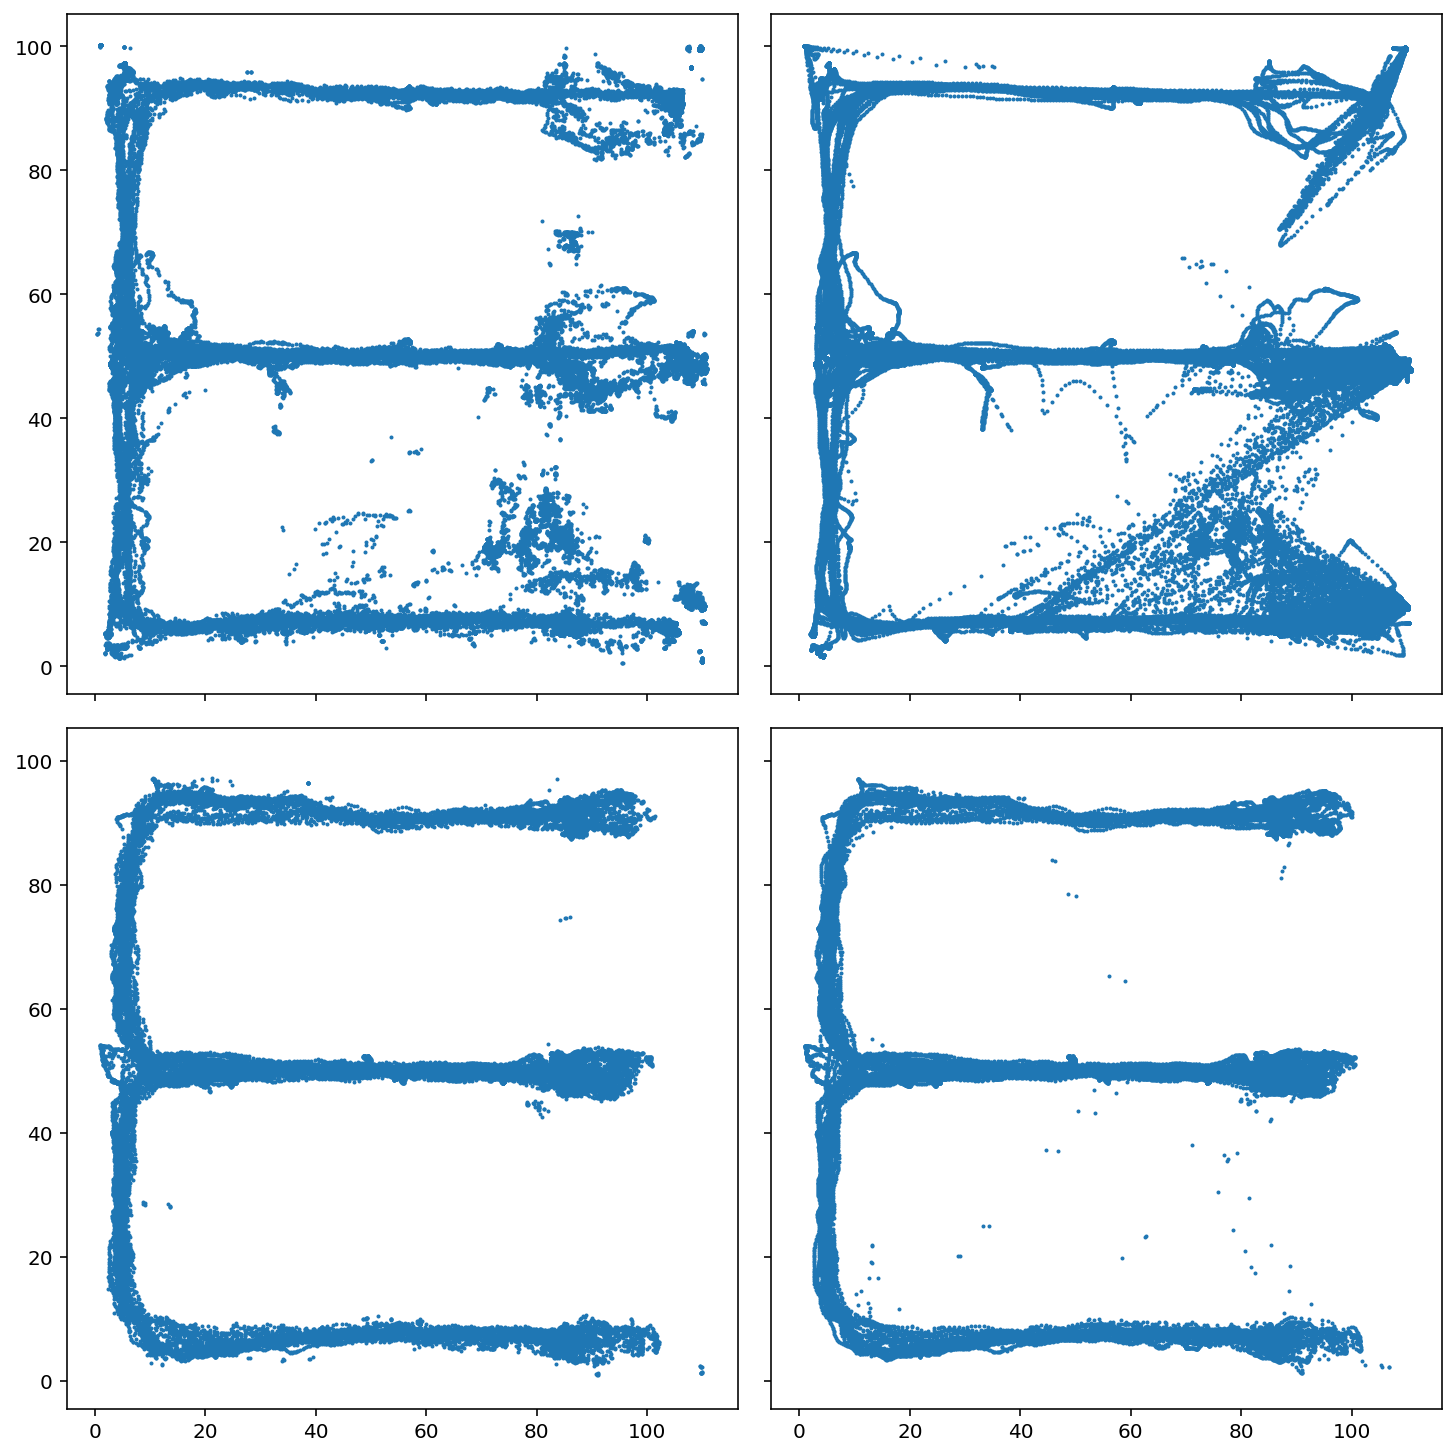

In [100]:
from src.kalman import filter_smooth_data

frame_rate = 125

COLUMNS = ['nose_x', 'nose_y',
           'tailBase_x', 'tailBase_y']
n_columns = len(COLUMNS)
data = position_info.loc[:, COLUMNS].values
process_variance = 4
measurement_variance = np.array([100, 100, 9, 9])

dt = 1 / frame_rate

state_covariance = np.identity(n_columns) * process_variance

state_transition = np.identity(n_columns)
measurement_covariance = np.identity(n_columns) * measurement_variance

prior_state = data[0]
prior_covariance = np.identity(n_columns) * process_variance
state_to_observed = np.identity(n_columns)

model = {
    'data': data,
    'state_transition': state_transition,
    'state_to_observed': state_to_observed,
    'state_covariance': state_covariance,
    'measurement_covariance': measurement_covariance,
    'prior_state': prior_state,
    'prior_covariance': prior_covariance}

posterior_mean, posterior_covariance = filter_smooth_data(model, True)

fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True,
                         constrained_layout=True)
axes[0, 0].scatter(data[:, 0], data[:, 1], s=1)
axes[0, 1].scatter(posterior_mean[:, 0], posterior_mean[:, 1], s=1)

axes[1, 0].scatter(data[:, 2], data[:, 3], s=1)
axes[1, 1].scatter(posterior_mean[:, 2], posterior_mean[:, 3], s=1)

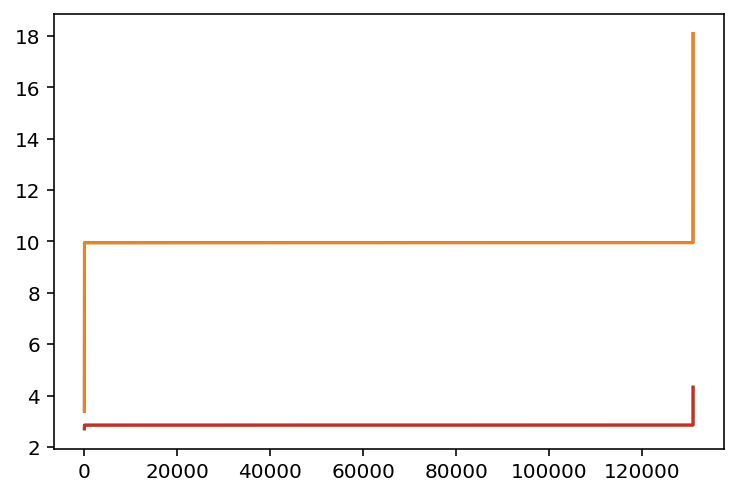

In [101]:
plt.plot(posterior_covariance[:, 0, 0])
plt.plot(posterior_covariance[:, 1, 1])
plt.plot(posterior_covariance[:, 2, 2])
plt.plot(posterior_covariance[:, 3, 3])

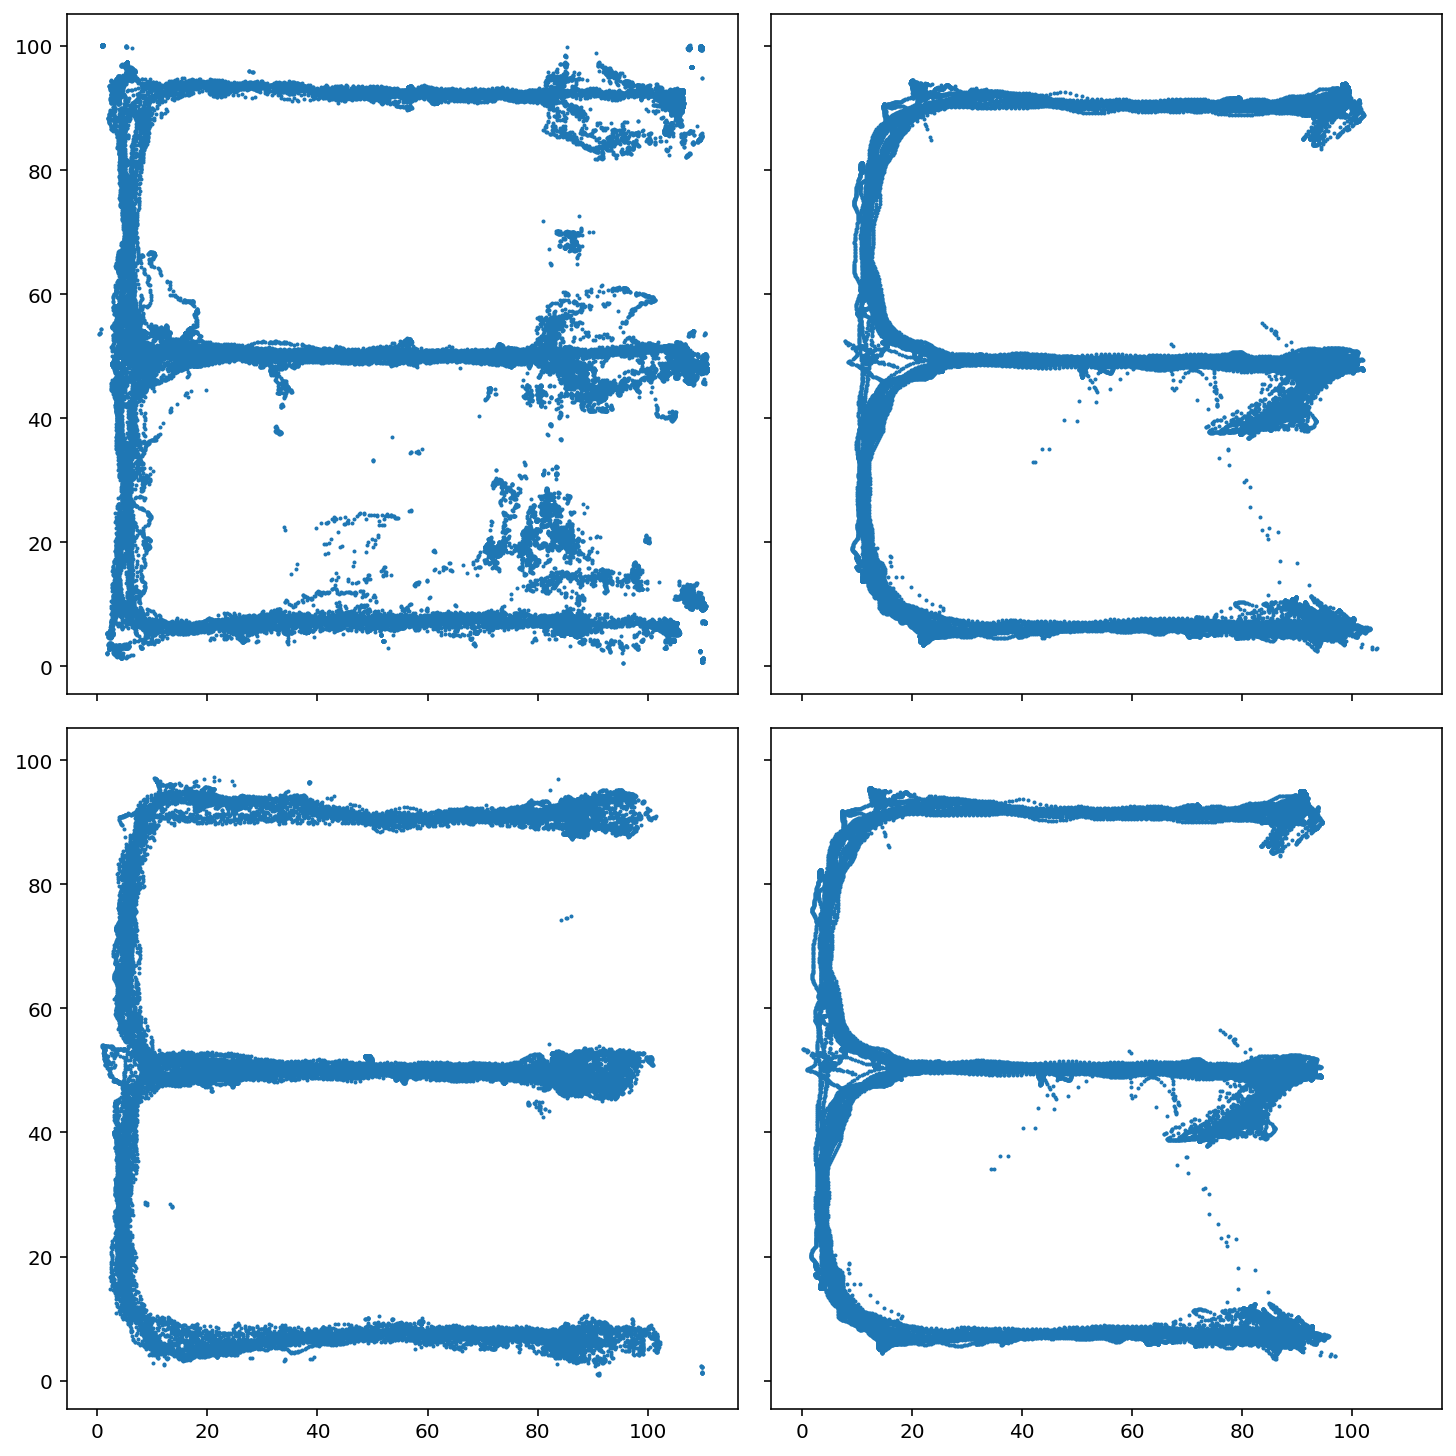

In [102]:
from src.kalman import filter_smooth_data

frame_rate = 125

COLUMNS = ['nose_x', 'nose_y',
           'tailBase_x', 'tailBase_y']
n_columns = len(COLUMNS)
data = position_info.loc[:, COLUMNS].values
process_variance = 1.0
measurement_variance = np.array([25, 25, 9, 9])

dt = 1 / frame_rate

state_covariance = np.array([[1.0, 0.0, 1.0, 0.0],
                             [0.0, 1.0, 0.0, 1.0],
                             [1.0, 0.0, 1.0, 0.0],
                             [0.0, 1.0, 0.0, 1.0],
                            ])

state_transition = np.identity(n_columns)
measurement_covariance = np.identity(n_columns) * measurement_variance

prior_state = data[0]
prior_covariance = np.identity(n_columns) * process_variance
state_to_observed = np.identity(n_columns)

model = {
    'data': data,
    'state_transition': state_transition,
    'state_to_observed': state_to_observed,
    'state_covariance': state_covariance,
    'measurement_covariance': measurement_covariance,
    'prior_state': prior_state,
    'prior_covariance': prior_covariance}

posterior_mean, posterior_covariance = filter_smooth_data(model, True)

fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True,
                         constrained_layout=True)
axes[0, 0].scatter(data[:, 0], data[:, 1], s=1)
axes[0, 1].scatter(posterior_mean[:, 0], posterior_mean[:, 1], s=1)

axes[1, 0].scatter(data[:, 2], data[:, 3], s=1)
axes[1, 1].scatter(posterior_mean[:, 2], posterior_mean[:, 3], s=1)